In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/estudiantes/estudiantes.csv


# Cargar los datos

In [2]:
df = pd.read_csv('/kaggle/input/estudiantes/estudiantes.csv')

df.head()
#print(df.shape)

,escuela,sexo,edad,direccion,tamano_familia,estatus_padres,educacion_madre,educacion_padre,trabajo_madre,trabajo_padre,...,calidad_relaciones_familiares,tiempo_libre,salidas,consume_alc_entre_semana,consume_alc_fin_semana,salud,ausencias,P1,P2,P3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Preparar los datos

In [3]:
#Eliminar filas con valores nulos, esto es opcional ya que mejor lo remplazamos por ceros
#df= df.dropna()

#verificar que los tipos de datos de cada columna sean correcto
#tipos_de_dato = df.dtypes
#print(tipos_de_dato)

#Hacer que la codificacion este correcta para que no haya errores de caracteres.
# Convertir todas las celdas del DataFrame a UTF-8
#data_frame = data_frame.applymap(lambda x: x.encode('latin-1').decode('utf-8', 'ignore'))

# Encontrar registros con todos los valores duplicados
#duplicados_completos = df[df.duplicated(df.columns, keep=False)]

#Imprimir los registros completos duplicados si los hay
#if not duplicados_completos.empty:
  #  print("SI HAY:")
#else:
  #  print("No hay registros con todos los valores iguales en el DataFrame.")
    
# Eliminar registros duplicados del DataFrame
#data_frame_sin_duplicados = data_frame.drop_duplicates()
# Imprimir información sobre la cantidad de registros eliminados
#registros_duplicados_elim = len(data_frame) - len(data_frame_sin_duplicados)
#print("Se eliminaron {} registros duplicados del DataFrame.".format(registros_duplicados_elim))
#data_frame = data_frame_sin_duplicados

#Remplazar valores nulos de registros por 0
#data_frame.fillna(0, inplace=True)
#Verificar si hay alguna celda nula en el DataFrame
#hay_nulos = df.isnull().any()
#if hay_nulos.any():
 #   print("Hay al menos una celda nula en el DataFrame.")
#else:
 #   print("No hay celdas nulas en el DataFrame.")

# Agregar columna estatus
esta columna marca un reprobado si en algun parcial el alumno saco menos del minimo aprobatorio (14)

In [4]:
#hola mundo
# Añadir la columna 'estatus'
df['estatus'] = df.apply(lambda row: 'reprobado' if row['P1'] < 14 or row['P2'] < 14 or row['P3'] < 14 else 'aprobado', axis=1)

# Modelo

2024-05-30 03:23:39.062042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-30 03:23:39.062203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-30 03:23:39.293235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 132.5776 - val_loss: 120.8643
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 128.6103 - val_loss: 118.9191
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 119.2550 - val_loss: 115.8788
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 119.5443 - val_loss: 111.8226
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 112.7611 - val_loss: 106.9834
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 110.3971 - val_loss: 101.4209
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 112.4833 - val_loss: 94.9335
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 101.4960 - val_loss: 87.5148
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96.3692 - val_loss: 78.8281
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 84.6380 - val_loss: 69.0761
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.3564 - val_loss: 58.8529
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/ste

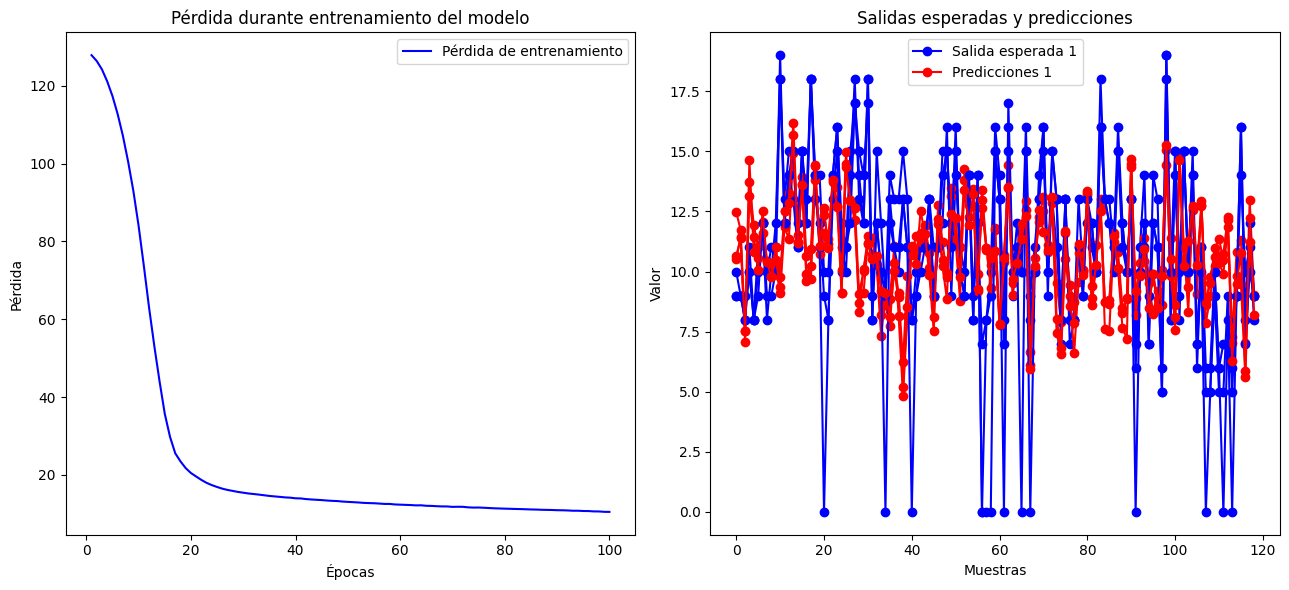

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Nueva predicción continuas: [[ 9.841985 10.209138 10.007019]]
El alumno reprobará.


In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Dense # type: ignore
from tensorflow.keras.models import Model # type: ignore

epocas = 100
entrenamiento = 0.70
size = [13, 6]

entradas = ['direccion', 'tamano_familia', 'estatus_padres', 'educacion_madre', 'educacion_padre','trabajo_madre','trabajo_padre','razon_escuela','traslado_escuela','tiempo_estudio','reprobacion','apoyo_educativo_adicional','apoyo_educativo_familiar','clases_extra_pagas','actividades_extracurriculares','asistio_guarderia','quiere_educacion_superior','internet','en_relacion_romantica','calidad_relaciones_familiares','tiempo_libre','salidas','consume_alc_entre_semana','consume_alc_fin_semana','salud','ausencias']



# Crear una copia del dataframe original
df_codificado = df.copy()

# Codificar las columnas categóricas a valores numéricos
label_encoders = {}
for column in entradas:
    if df_codificado[column].dtype == 'object':
        le = LabelEncoder()
        df_codificado[column] = le.fit_transform(df_codificado[column])
        label_encoders[column] = le

# Guardar el dataframe codificado como un archivo CSV
df_codificado.to_csv('/kaggle/working/dataset_codificado.csv', index=False)

# Codificar las columnas categóricas a valores numéricos
label_encoders = {}
for column in entradas:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le        
        
 #Preparar los datos de entrada y salida
datos_entrada = df[entradas].values
datos_salida = df[['P1', 'P2', 'P3']].values

# Dividir los datos en Training set y Validation set
cantidad_datos = len(df)
entrenamiento = int(cantidad_datos * entrenamiento)

training_input = datos_entrada[:entrenamiento]
training_output = datos_salida[:entrenamiento]
validation_input = datos_entrada[entrenamiento:]
validation_output = datos_salida[entrenamiento:]

# Convertir los valores a tensores
train_inputs = tf.convert_to_tensor(training_input, dtype=tf.float32)
train_outputs = tf.convert_to_tensor(training_output, dtype=tf.float32)
val_inputs = tf.convert_to_tensor(validation_input, dtype=tf.float32)
val_outputs = tf.convert_to_tensor(validation_output, dtype=tf.float32)

# Definir el modelo
input_layer = Input(shape=(len(entradas),))
hidden_layer = Dense(16, activation='relu')(input_layer)
hidden_layer = Dense(8, activation='relu')(hidden_layer)
output_layer = Dense(3, activation='linear')(hidden_layer)  # tres salidas lineales

model = Model(inputs=input_layer, outputs=output_layer)

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo con datos de entrenamiento y validación
history = model.fit(train_inputs, train_outputs, epochs=epocas, validation_split=0.2, batch_size=32, verbose=1)

# Evaluar el modelo con los datos de validación
loss = model.evaluate(val_inputs, val_outputs)
print(f'Loss en el conjunto de validación: {loss}')

# Predecir con nuevas entradas
predicciones = model.predict(val_inputs)

# Crear una figura y dos subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(size[0], size[1]))

# Obtener la pérdida del historial de entrenamiento
loss = history.history['loss']

# Graficar la pérdida en el primer subplot
epochs = range(1, len(loss) + 1)
ax1.plot(epochs, loss, 'b', label='Pérdida de entrenamiento')
ax1.set_title('Pérdida durante entrenamiento del modelo')
ax1.set_xlabel('Épocas')
ax1.set_ylabel('Pérdida')
ax1.legend()

# Graficar las salidas esperadas y las predicciones en el segundo subplot
for i in range(3):  # Iterar sobre las cuatro salidas (P1, P2, P3, estatus)
    ax2.plot(range(len(validation_output)), validation_output[:, i], 'bo-', label=f'Salida esperada {i+1}' if i == 0 else "")
    ax2.plot(range(len(predicciones)), predicciones[:, i], 'ro-', label=f'Predicciones {i+1}' if i == 0 else "")

ax2.set_title('Salidas esperadas y predicciones')
ax2.set_xlabel('Muestras')
ax2.set_ylabel('Valor')
ax2.legend()

# Ajustar los subplots para evitar solapamiento
plt.tight_layout()

# Mostrar la figura con los dos subplots
plt.show()

def predecir_nuevo(valores_reales):
    # Convertir los valores a un tensor de tipo float32 y darle la forma correcta
    valores_reales_tensor = tf.convert_to_tensor([valores_reales], dtype=tf.float32)
    # Predecir con el nuevo dato
    prediccion = model.predict(valores_reales_tensor)
    return prediccion

# Ejemplo de valores reales, usando la tabla del dataset codificado 
valores_reales = [1, 1, 1, 4, 4, 1, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 3, 2, 3, 4, 6]

# Ejemplo de predicción con valores reales
nueva_prediccion = predecir_nuevo(valores_reales)
print('Nueva predicción continuas:', nueva_prediccion)
# Validar si alguno de los valores de salida es menor a catorce
if any(valor < 10 for valor in nueva_prediccion[0]):
    print("El alumno reprobará.")
else:
    print("El alumno pasará.")